# Decision Tree and Random Forest

## Setting the stage

It is a common question to ask: what is the difference between Decision Tree and Random Forest? In this notebook, I'm going to journal down my understanding about the two using scikit-learn package.

## So what are the algorithms? Let's use XiaoMing to demonstrate concept

Imaging that we have a colleague called XiaoMing and he is not here with us today. We would like to organize a birthday party to suprise him, but we are not too sure how to organize a party that he would surely enjoy. So, we know that XiaoMing has 5 best friends in the office. (YES, **5** is my favourite number). Each best friend represents a single decision tree. We can have two approaches:<br />
1) Decision Tree Appraoch (Ask one of the best friends) <br />
We found one of the selected best friends of Xiao Ming and prepared 5 MCQ questions, asking all 5 questions sequentially. From there we would know whether Xiao Ming love our party ideas. This approach is less time consuming and easy to interpret but with potential bias from this selected friend. <br /><br />
2) Random Forest Approach (Ask all the best friends)<br />
We reached out to all of his 5 best friends, and ask the questions randomly (up to 5 MCQ questions) to avoid bias (Always keep in mind that when we introduce the randomizing mechanism, we can reduce the bias) . We then consolidated the voting and from there we would know whether Xiao Ming love our party ideas. This approach is much time consuming and not easy to interpret but with less bias. <br />

<img src='../image/DC_and_RF.png'/></a>
___

## So Which One To Choose – Decision Tree or Random Forest?
Every algorithm has its pros and cons. Decision tree is easier to interpret and less computationally expensive; Random Forest is suitable for processing large dataset, mitigating presence of bias (due to a single tree), and when interpretability is not a major need. Below with the characteristic summary of the two, we analyst should employ them according to our need.

## The Data
Let's use the same [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) throughout the discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) to compare performance metrics across these related models.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df = pd.read_csv("../DATA/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## EDA
### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum() #no missing data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Visualization

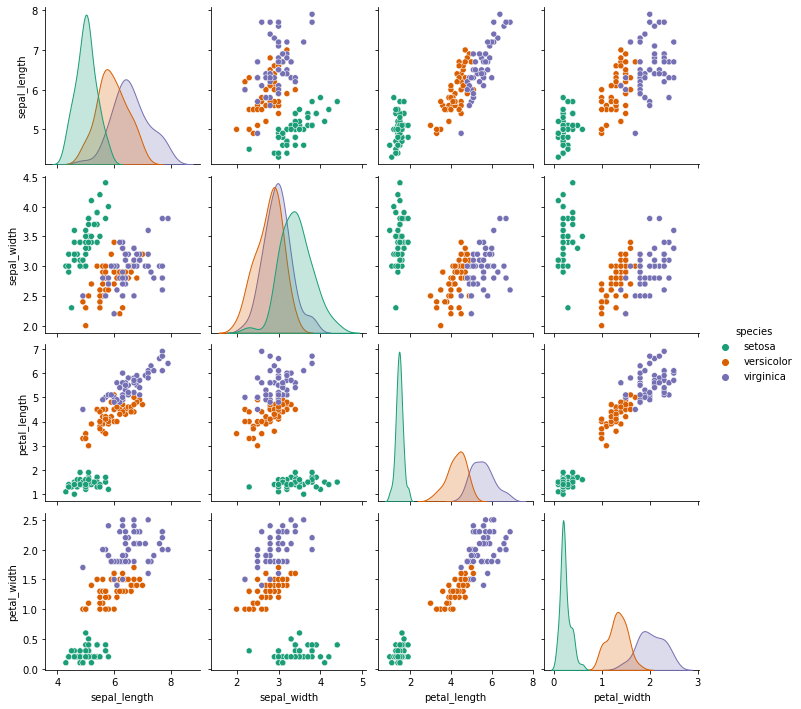

In [7]:
sns.pairplot(df,hue='species',palette='Dark2')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

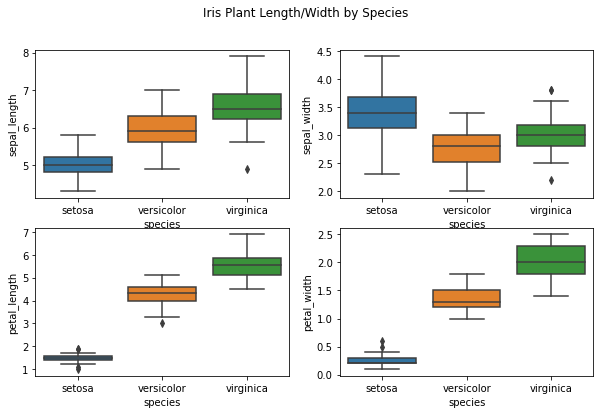

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) # consolidate multiple plots in one figure

fig.suptitle('Iris Plant Length/Width by Species')
sns.boxplot(ax=axes[0, 0], data=df, x='species', y='sepal_length')
sns.boxplot(ax=axes[0, 1], data=df, x='species', y='sepal_width')
sns.boxplot(ax=axes[1, 0], data=df, x='species', y='petal_length')
sns.boxplot(ax=axes[1, 1], data=df, x='species', y='petal_width')

## Scikit-learn Libraries for Decision Tree
Following scikit-learn are used with usage explained:<br />
- model_selection >> to use the train_test_split data preparation function<br />
- tree >> to use the DecisionTreeClassifier modelling, plot_tree visualisation function <br />
- metrics >> to use the confusion_matrix, classification_report, plot_confusion_matrix function<br />
    

## Train | Test Split

In [68]:
# prepare data
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']
#y = pd.get_dummies(df['species']) # no need to do this 


# split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101) # set 70% for training, 30%  for testing

## ====================== Decision Tree Classifier Set-up =======================

In [84]:
# Default hyperparameter
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier() #setting up model
model1.fit(X_train,y_train) # feeding model with training dataset
base_pred = model1.predict(X_test)

## Evaluation

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


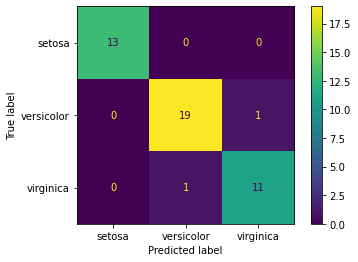

In [124]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, accuracy_score
print(confusion_matrix(y_test,base_pred))
plot_confusion_matrix(model1,X_test,y_test) #visualise confusion matrix

In [47]:
# accuracy
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [86]:
pd.DataFrame(index=X.columns,data=model1.feature_importances_,
             columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
petal_width,0.937469
petal_length,0.040991
sepal_width,0.021540
sepal_length,0.000000


## Visualise the Tree

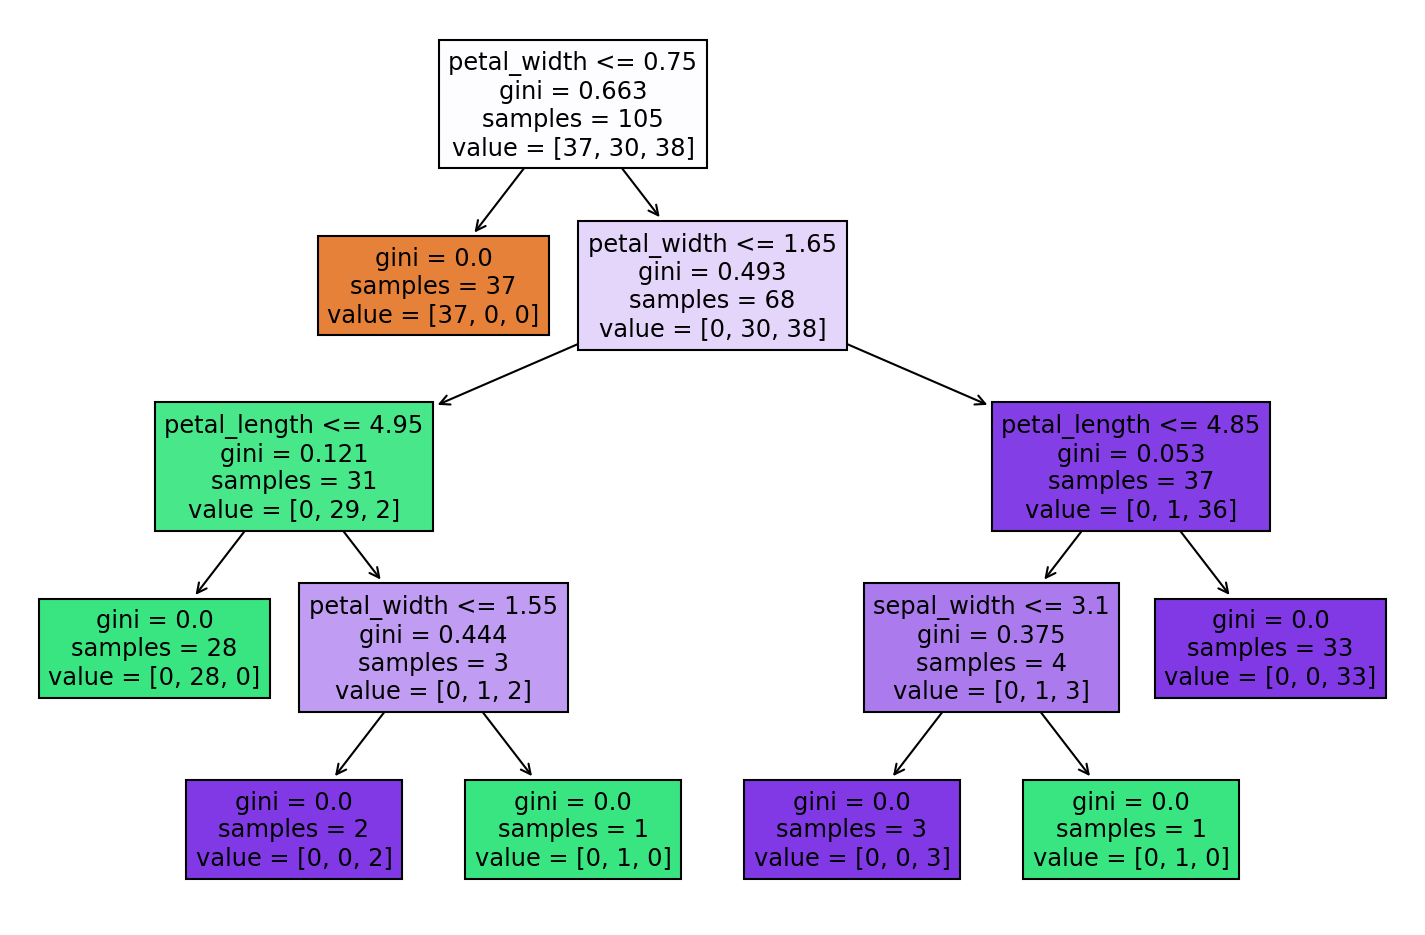

In [88]:
from sklearn.tree import plot_tree
#plt.figure(figsize=(12,8))
#plot_tree(model);

plt.figure(figsize=(12,8),dpi=150)
plot_tree(model1,filled=True,feature_names=X.columns);

## Reporting Model Results with Single Function

Let's create a function that reports back classification results and plots out the tree.

In [98]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    print( pd.DataFrame(index=X.columns,data=model.feature_importances_,
             columns=['Feature Importance']).sort_values('Feature Importance',ascending=False))
    print('\n')
    plt.figure(figsize=(6,6),dpi=150)
    plot_confusion_matrix(model1,X_test,y_test) 
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



              Feature Importance
petal_width             0.937469
petal_length            0.040991
sepal_width             0.021540
sepal_length            0.000000






<Figure size 900x900 with 0 Axes>

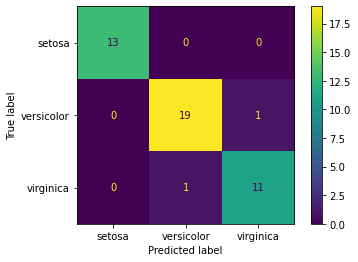

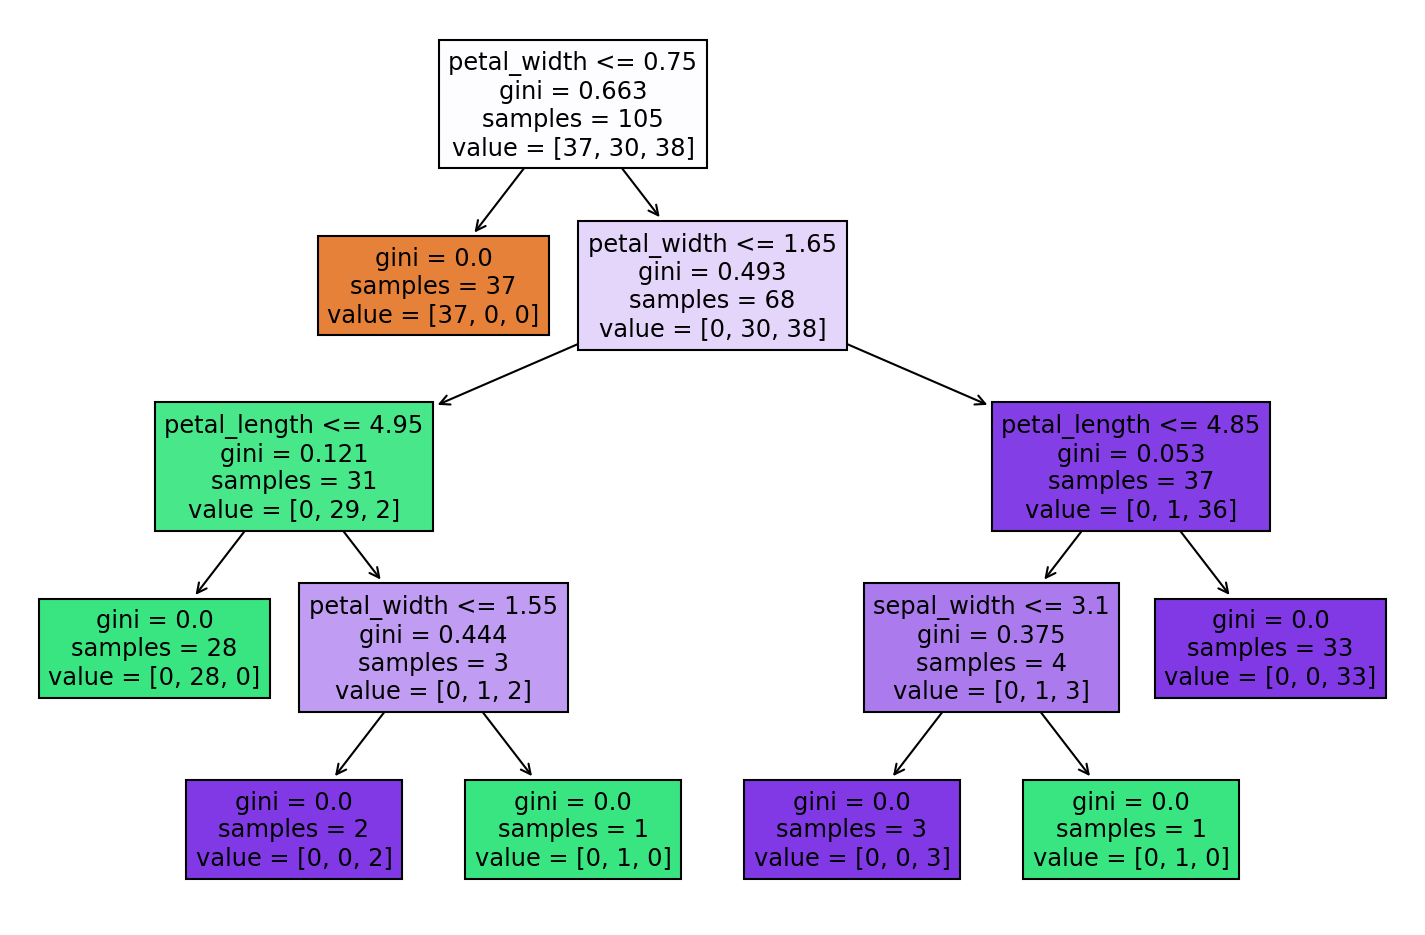

In [99]:
report_model(model1)

In model1, the depth is four and the most important feature is petal width.

## Understanding Hyperparameters

Let's look at the parameters used in the first model

In [95]:
model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Let's modify depth to 2.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      0.95      0.93        20
   virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



              Feature Importance
petal_width                  1.0
sepal_length                 0.0
sepal_width                  0.0
petal_length                 0.0






<Figure size 900x900 with 0 Axes>

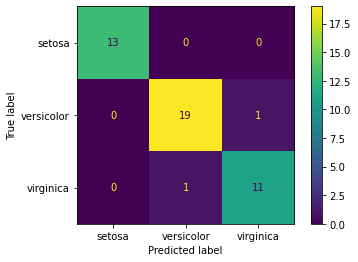

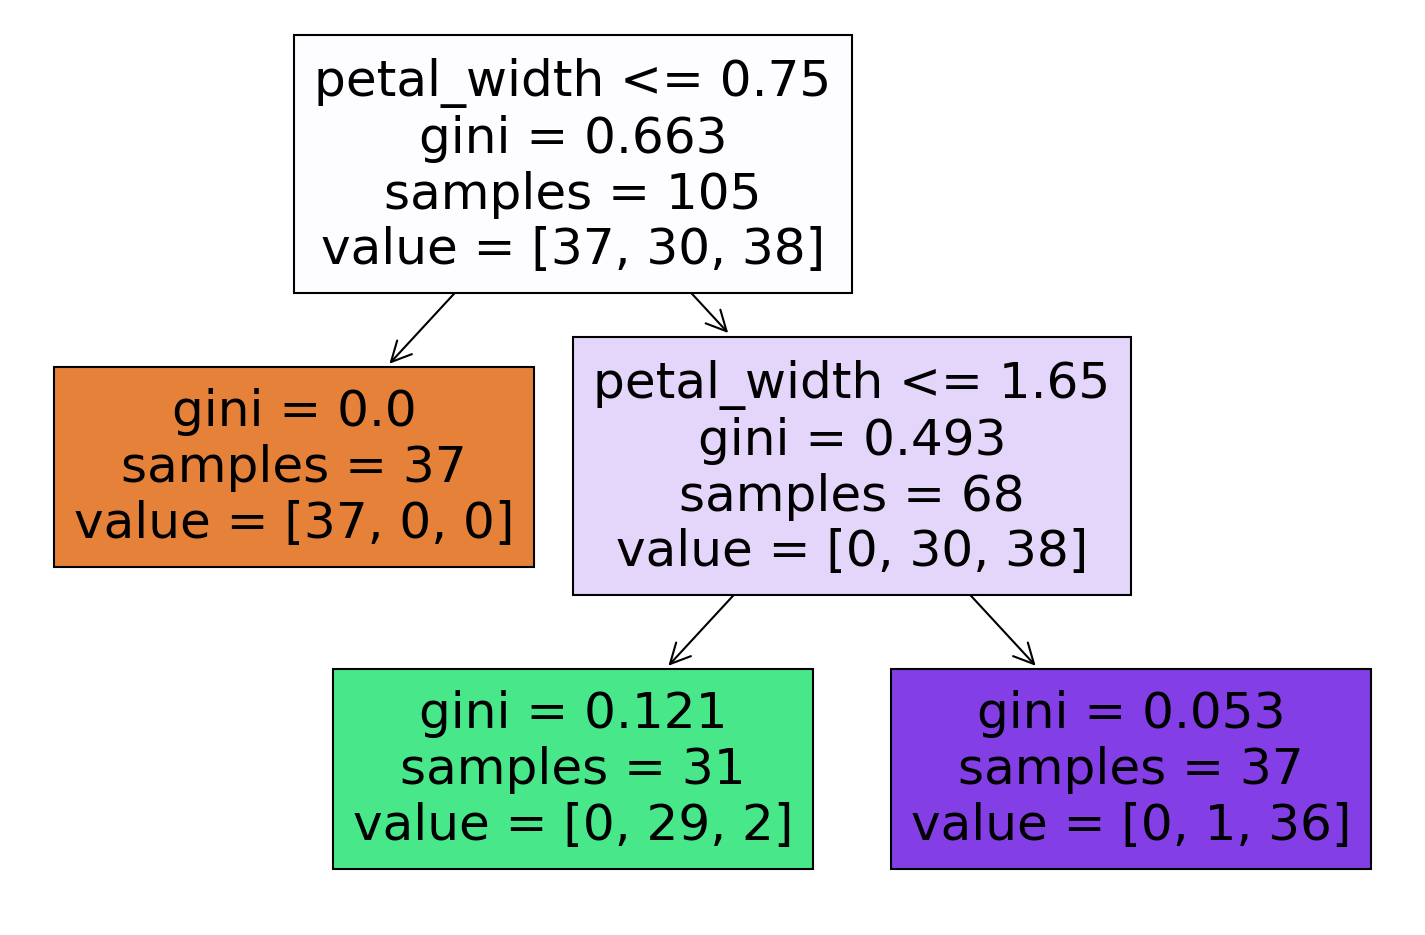

In [107]:
model2 = DecisionTreeClassifier(max_depth=2) #setting up new model
model2.fit(X_train,y_train) # feeding model with training dataset
base_pred = model2.predict(X_test)

report_model(model2)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      0.95      0.93        20
   virginica       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



              Feature Importance
petal_width                  1.0
sepal_length                 0.0
sepal_width                  0.0
petal_length                 0.0






<Figure size 900x900 with 0 Axes>

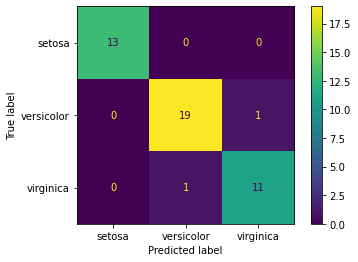

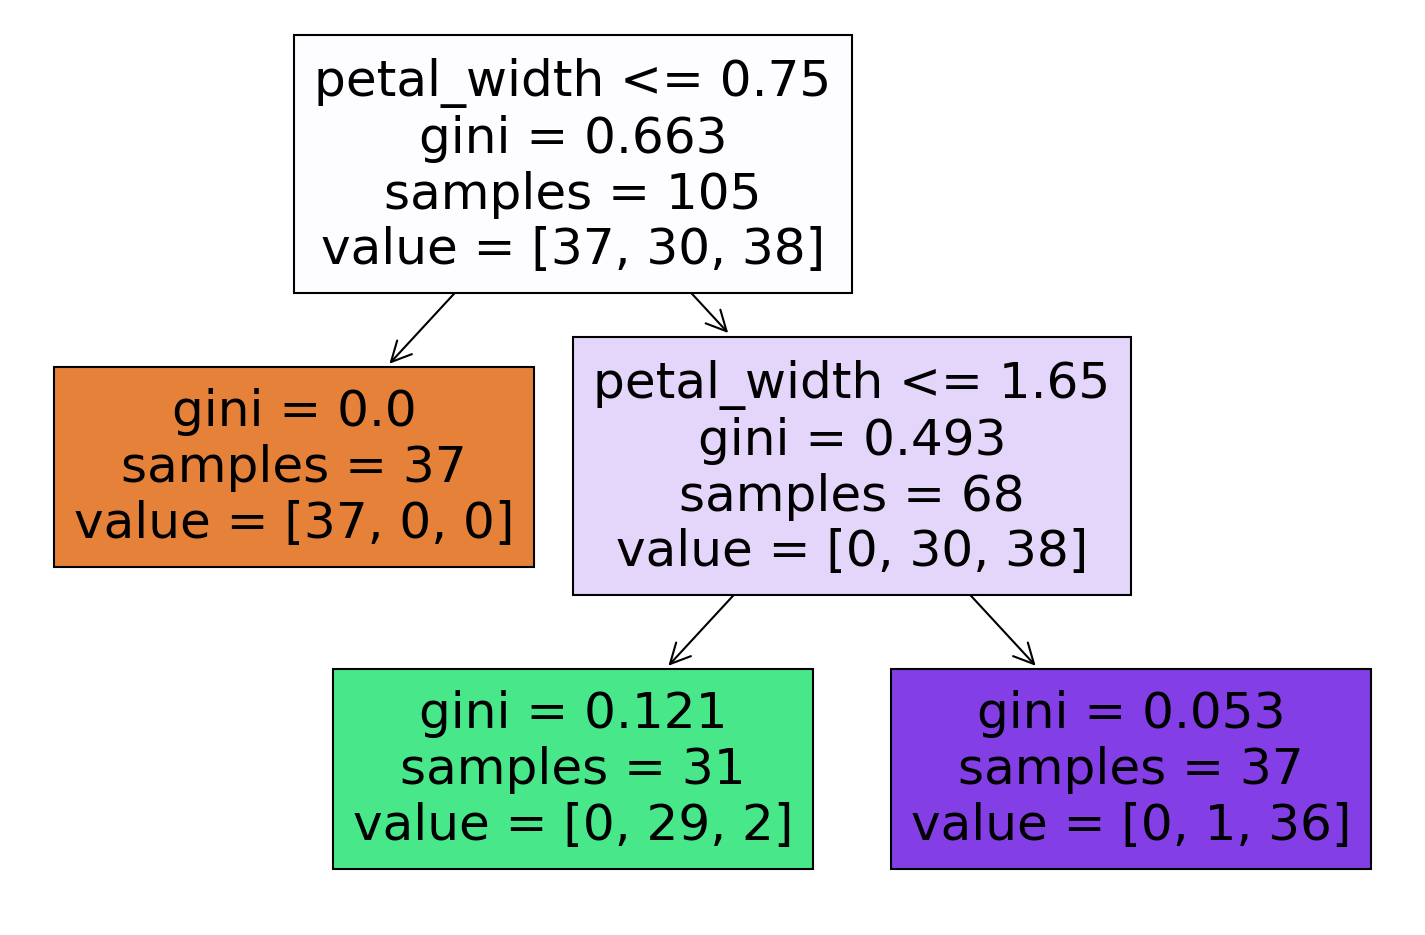

In [101]:
model3 = DecisionTreeClassifier(max_leaf_nodes=3) #setting up new model
model3.fit(X_train,y_train) # feeding model with training dataset
base_pred = model3.predict(X_test)

report_model(model3)

For more hyperparameters, check out below:

In [109]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

## ===================== Random Forest Classifier Set-up ======================

## Scikit-learn Libraries for Random Forest
Following scikit-learn are used with usage explained:<br />
- model_selection >> to use the train_test_split data preparation function<br />
- ensemble >> to use the RandomForestClassifier modelling <br />
- metrics >> to use the confusion_matrix, classification_report, plot_confusion_matrix function<br />

In [118]:
from sklearn.ensemble import RandomForestClassifier
model50 = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101) #50 decision trees
model50.fit(X_train, y_train)
base_pred = model50.predict(X_test)

## Evaluation

In [135]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    print( pd.DataFrame(index=X.columns,data=model.feature_importances_,
             columns=['Feature Importance']).sort_values('Feature Importance',ascending=False))
    print('\n')
    plt.figure(figsize=(6,6),dpi=150)
    plot_confusion_matrix(model1,X_test,y_test) 
    print('\n')
    print("accurary", accuracy_score(y_test, model_preds))
    #plt.figure(figsize=(12,8),dpi=150)
    #plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



              Feature Importance
petal_length            0.444290
petal_width             0.427252
sepal_length            0.097757
sepal_width             0.030700




accurary 0.9555555555555556


<Figure size 900x900 with 0 Axes>

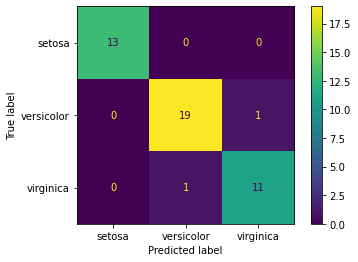

In [136]:
report_model(model50)

## Choosing correct number of trees
Let's explore optimal number of trees to balance accuracy performance and computation power (i.e. the more the trees, the less the computational effeciency)...

In [143]:
test_error = []

for n in range(1,50):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto',random_state=101)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(y_test, test_preds))
 

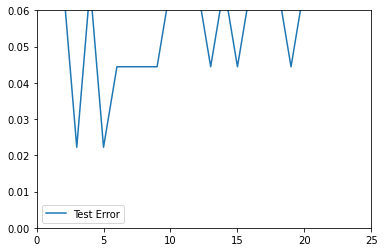

In [144]:
plt.plot(range(1,50),test_error,label='Test Error')

# Change current axes
plt.xlim(0, 25)
plt.ylim(0, 0.06)

plt.legend()

In [145]:
test_error

[0.11111111111111116,
 0.06666666666666665,
 0.022222222222222254,
 0.06666666666666665,
 0.022222222222222254,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.0444444444444444,
 0.06666666666666665,
 0.0444444444444444,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.0444444444444444,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.0444444444444444,
 0.06666666666666665,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.044444444

Clearly there are diminishing error. After about 3 trees, we can extract most information with minimal test error.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



              Feature Importance
petal_width             0.676249
petal_length            0.285437
sepal_width             0.033694
sepal_length            0.004620




accurary 0.9777777777777777


<Figure size 900x900 with 0 Axes>

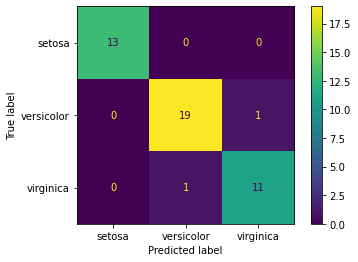

In [146]:
# final model
model_three = RandomForestClassifier(n_estimators=3, random_state=101)
model_three.fit(X_train, y_train)
pred = model_three.predict(X_test)
report_model(model_three)